In [10]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import missingno

In [11]:
%run pandas_missing.ipynb

CARGA DE DATOS DE NHANES

In [12]:
nhanes_raw_df =(
    nhanes.load.load_NHANES_data(year="2017-2018")
    .clean_names(case_type= 'snake')
)
nhanes_raw_df.shape

(8366, 197)

In [13]:
nhanes_df =(
    nhanes_raw_df
    .select_columns(
        'general_health_condition',
        'age_in_years_at_screening',
        'gender',
        'current_selfreported_height_inches',
        'current_selfreported_weight_pounds',
        'doctor_told_you_have_diabetes',
        '60_sec_pulse30_sec_pulse2',
        'total_cholesterol_mgdl',

        
    )
    .rename_columns(
        {   
            'general_health_condition' : 'generalStatus',
            'age_in_years_at_screening': 'age',
            'current_selfreported_height_inches': 'height',
            'current_selfreported_weight_pounds': 'weight',
            'doctor_told_you_have_diabetes': 'diabetes',
            '60_sec_pulse30_sec_pulse2': 'pulse',
            'total_cholesterol_mgdl': 'total_cholesterol',

        }
    )
    .replace(
        {
            'height': {
                9999: np.nan,
                7777: np.nan,
            },
            'weight': {
                9999: np.nan,
                7777: np.nan,
            },
            'diabetes': {
                'Borderline': np.nan
            }
        }
    )
    .missing.sort_variables_by_missingness()
    .dropna(
        subset = ['diabetes'],
        how = 'any'
    )
    .transform_column(
        column_name = 'diabetes',
        function = lambda s: s.astype(int),
        elementwise = False
    )
)

/home/fouster/miniforge3/envs/imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)
/home/fouster/miniforge3/envs/imputacion/lib/python3.9/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


In [14]:
nhanes_df =nhanes_df.reset_index()

<Axes: >

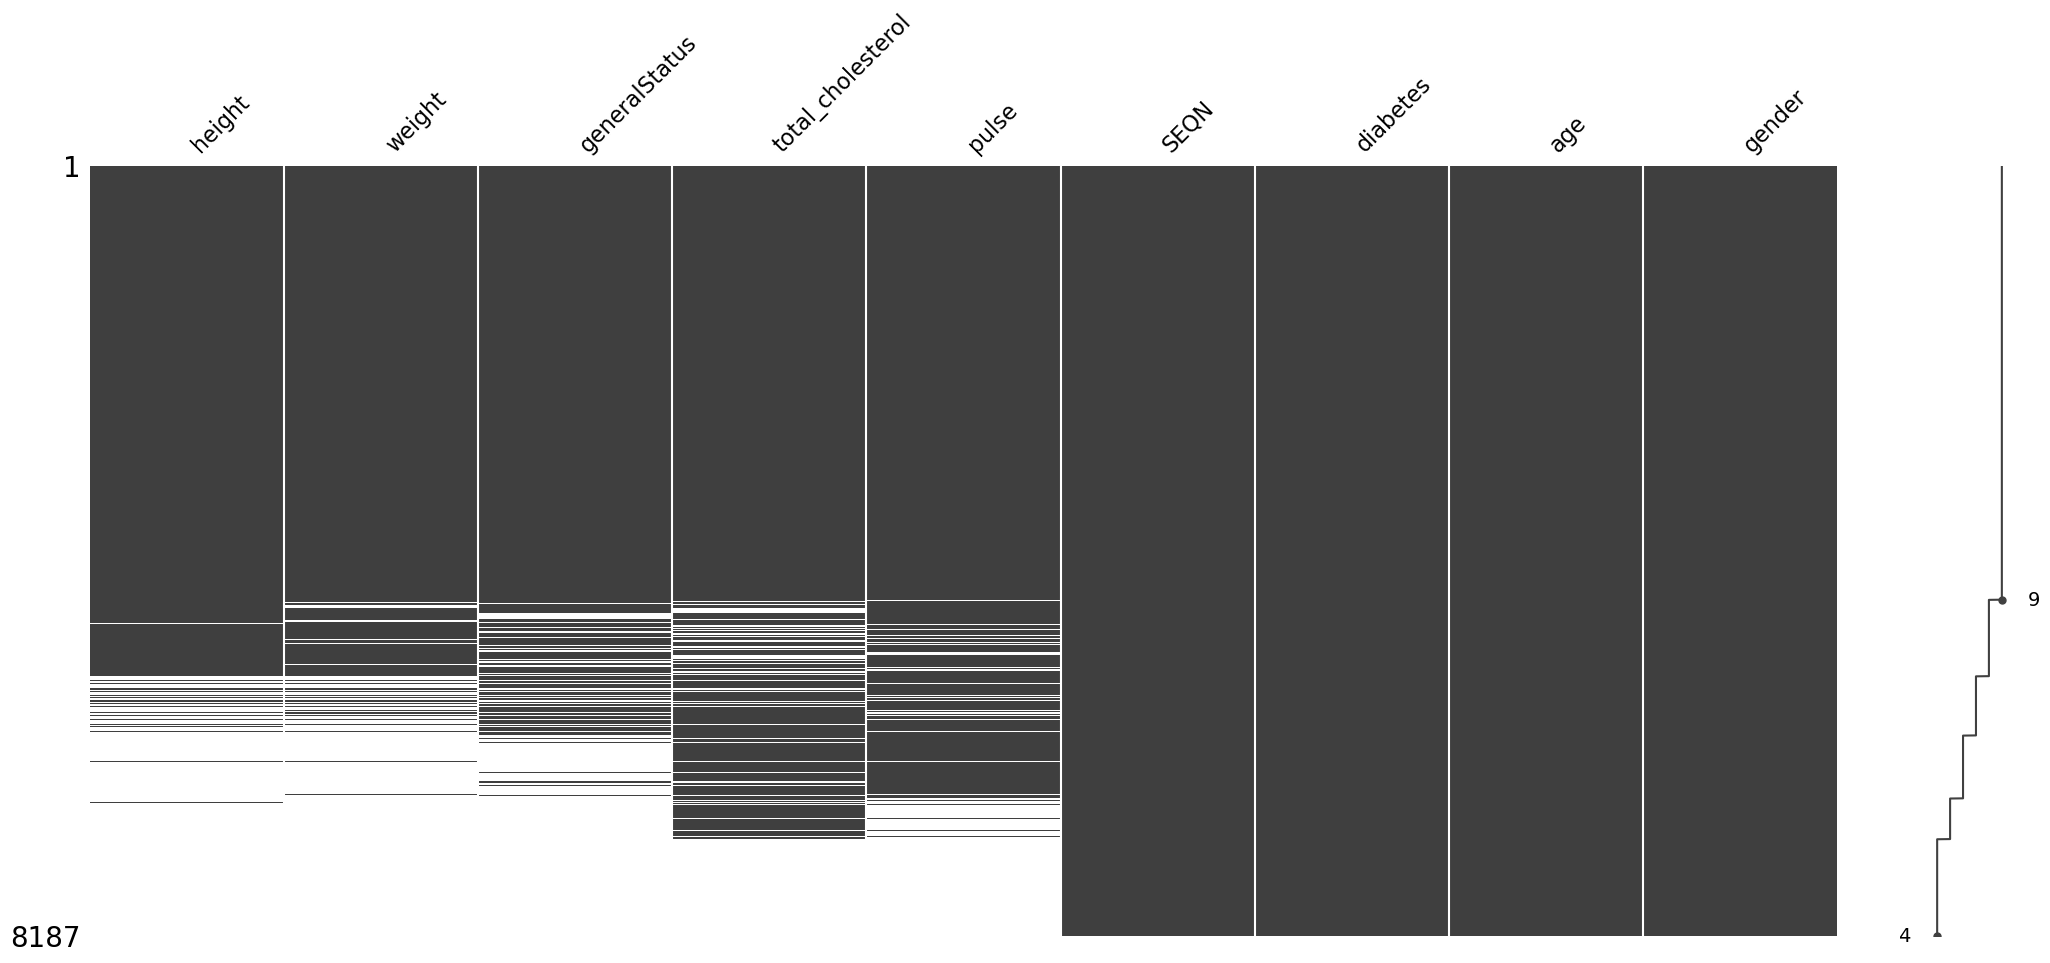

In [15]:
nhanes_df.missing.sort_variables_by_missingness().pipe(missingno.matrix, sort = "descending")

/home/fouster/miniforge3/envs/imputacion/lib/python3.9/site-packages/upsetplot/plotting.py:662: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['#0000002e' '#0000002e' '#0000002e' '#0000002e' '#0000002e' '#0000002e'
 '#0000002e' '#0000002e' '#0000002e' 'black' '#0000002e' '#0000002e'
 '#0000002e' '#0000002e' '#0000002e' '#0000002e' '#0000002e' '#0000002e'
 '#0000002e' 'black' '#0000002e' '#0000002e' '#0000002e' '#0000002e'
 '#0000002e' '#0000002e' '#0000002e' '#0000002e' '#0000002e' 'black'
 '#0000002e' '#0000002e' '#0000002e' '#0000002e' '#0000002e' '#0000002e'
 '#0000002e' '#0000002e' '#0000002e' 'black' '#0000002e' '#0000002e'
 '#0000002e' '#0000002e' '#0000002e' '#0000002e' '#0000002e' '#0000002e'
 '#0000002e' 'black' '#0000002e' '#0000002e' '#0000002e' '#0000002e'
 'black' 'black' '#0000002e' '#0000002e' '#0000002e' '#0000002e'
 '#0000002e' '#0000002e' '#0000002e' 'black' '#0000002e' 'black'
 '#0000002e' '#0000

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

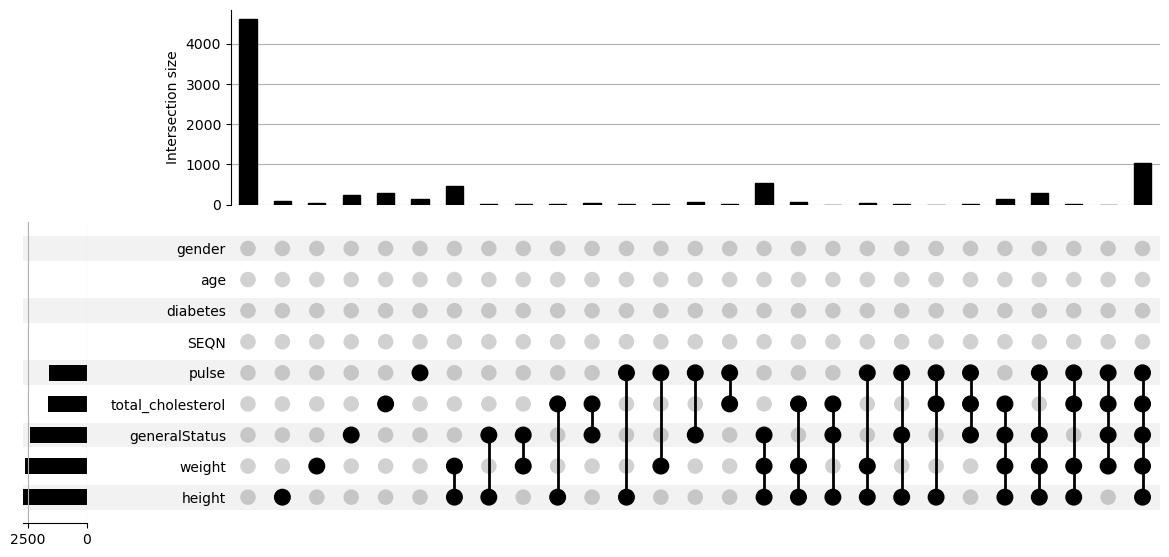

In [16]:
nhanes_df.missing.sort_variables_by_missingness().missing.missing_upsetplot()

ELIMINACIÓN DE VALORES FALTANTES

<Axes: >

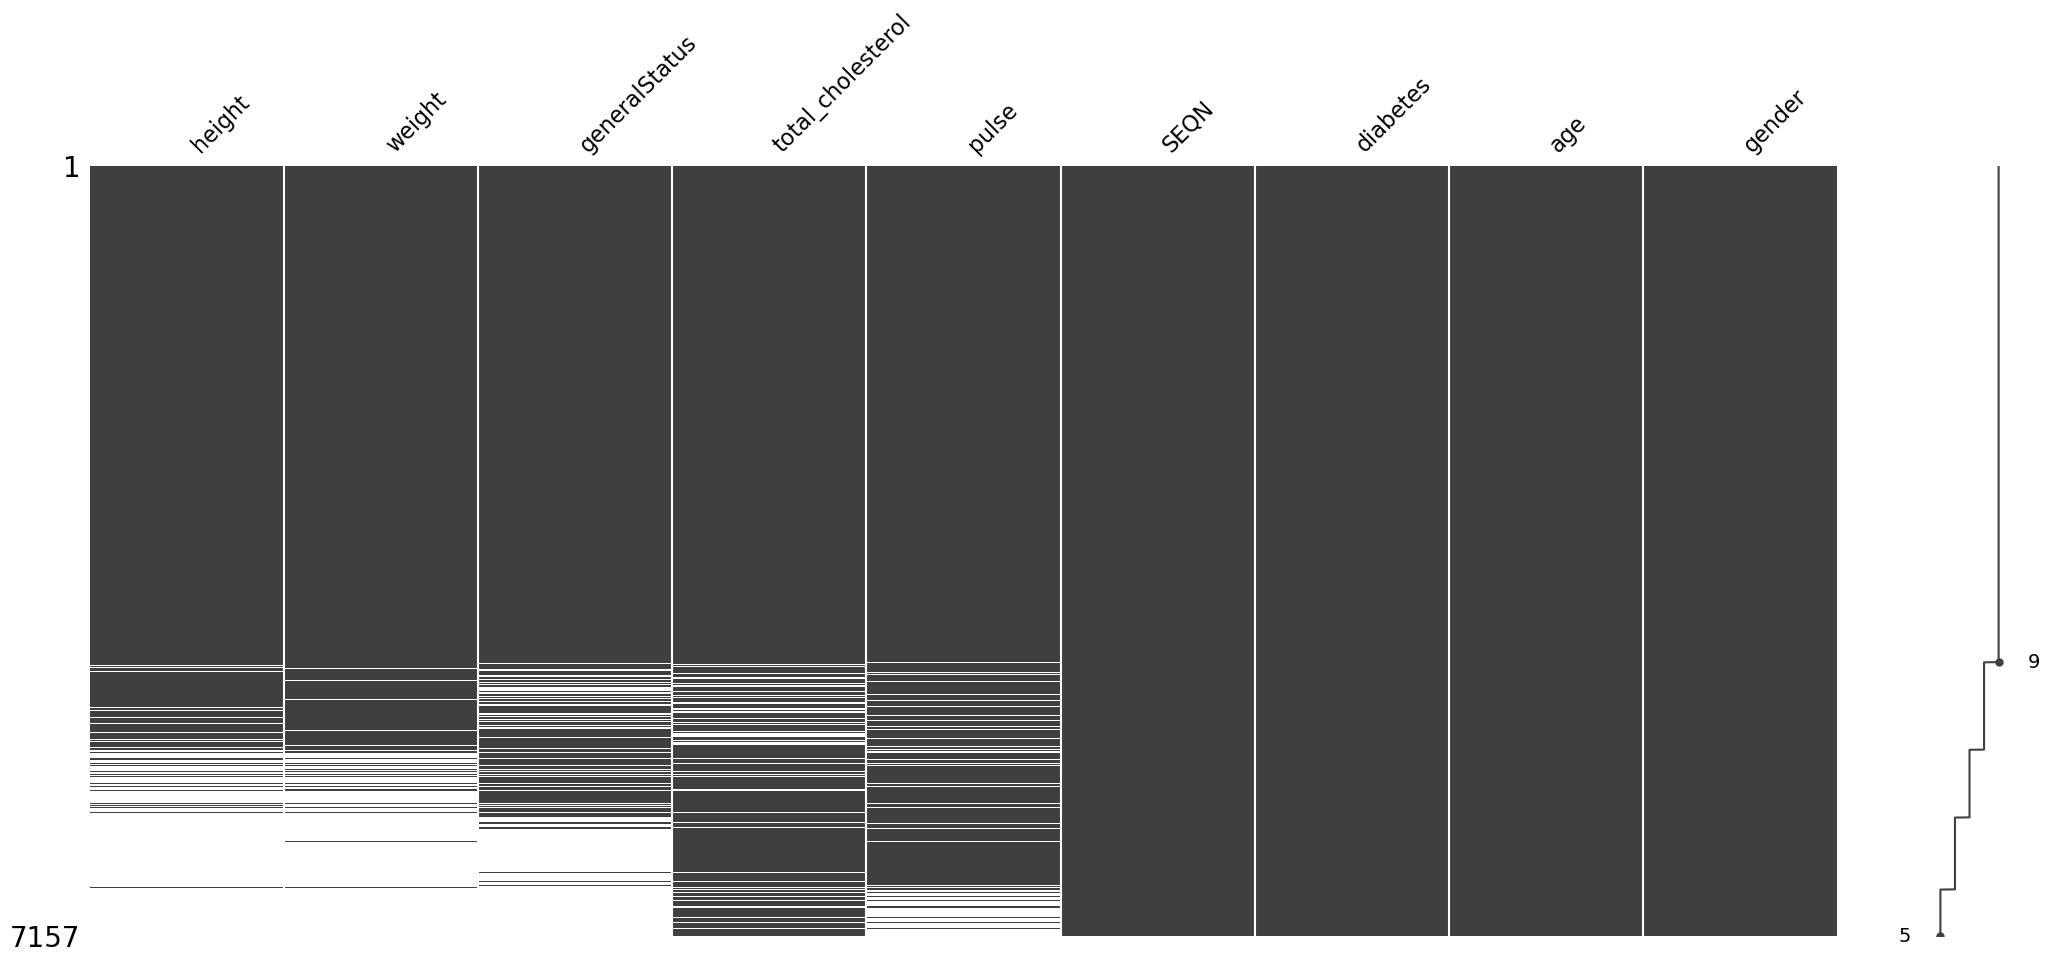

In [18]:
nhanes_df.dropna(subset=["pulse","total_cholesterol", "generalStatus", "weight", "height"], how= "all").missing.sort_variables_by_missingness().pipe(missingno.matrix, sort= "descending")

In [19]:
nhanes_df = nhanes_df.dropna(subset=["pulse","total_cholesterol", "generalStatus", "weight", "height"], how= "all").missing.sort_variables_by_missingness()
nhanes_df.shape

(7157, 9)